# Analyzing Video Games Across Genres

**Participant ID:**  M13

**Date / Time:**

# Introduction
Welcome to our data analysis study. For this study, you'll be working with a dataset sourced [Corgis Datasets Project](https://corgis-edu.github.io/corgis/).

The data was originally published in the publication [“What makes a blockbuster video game? An empirical analysis of US sales data.” Managerial and Decision Economics](https://researchportal.port.ac.uk/en/publications/what-makes-a-blockbuster-video-game-an-empirical-analysis-of-us-s) by Dr Joe Cox. 

The dataset has information about the sales and playtime of over a thousand video games released between 2004 and 2010. The playtime information was collected from crowd-sourced data on ["How Long to Beat"](https://howlongtobeat.com/).

- You will use pandas to complete **data cleanup and manipulation** tasks.
- Pandas is set up and ready for use, along with other Python libraries such as Matplotlib, Seaborn, and Altair for data visualization.
- You are allowed to use internet resources like documentation and forums, including Stack Overflow, to assist you in completing the tasks.
- Carefully follow the step-by-step instructions provided for each task.
- In some cases, you will be asked to document your findings. Please do this in writing in a markdown cell.
- As you work through the tasks, take note of any interesting findings or challenges with the software or pandas that you may encounter, either by speaking your thoughts out loud or taking notes in a markdown cell.
- Feel free to add new code and markdown cells in the notebook as necessary to complete the tasks.

In [25]:
import helpers as h
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
pd.set_option('display.max_rows',None)

 ## Data Description

The table below describes the different columns in the dataset. Each row in the dataset represents a video game.

| Column        | Description                                                                                                                                                           |
|---------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Title         | Full title of the game.                                                                                                                                               |
| Max Players   | The maximum number of players that can play this game.                                                                                                                |
| Multiplatform | Whether this game is available on multiple platforms.                                                                                                                 |
| Online        | Whether this game supports online play.                                                                                                                               |
| Genres        | The main genre that this game belongs to.                                                                                                                             |
| Licensed      | Whether this game was based off a previously licensed entity.                                                                                                         |
| Publishers    | The publishers who created this game.                                                                                                                                 |
| Review Score  | A review score for this game, out of 100.                                                                                                                             |
| Re-release    | Whether this game is a re-release of an earlier one.                                                                                                                  |
| Year          | The year that this game was released.                                                                                                                                 |
| Comp_Time_All | The median time that players reported completing the game in any way, in hours.                                                                                       |
| Comp_Time_Main| The median time that players reported completing the main game storyline, in hours.                                                                                   |

In [26]:
df = pd.read_csv('video_games.csv')
df.head()

,Title,Max Players,Multiplatform?,Online?,Genres,Licensed?,Comp_Time_All,Re-release?,Comp_Time_Main,Review Score,Year,Publishers
0,Super Mario 64 DS,1,True,True,Action,True,24.48,True,14.50,85,2004,Nintendo
1,Lumines: Puzzle Fusion,1,True,True,Strategy,True,10.00,True,10.00,89,2004,Ubisoft
2,WarioWare Touched!,2,True,True,Action,True,2.50,True,1.83,81,2004,Nintendo
3,Hot Shots Golf: Open Tee,1,True,True,Sports,True,-100.00,True,-100.00,81,2004,Sony
4,Spider-Man 2,1,True,True,Action,True,10.00,True,8.00,61,2004,Activision


# Task 1: Column Names and Data Types

In the first task we will perform some basic data cleaning operations to get our dataset ready for further tasks.

### **Task 1a: Remove Columns**

Remove the following columns to streamline the dataset for further analysis:

- **_Re-release?:_** Boolean flag indicating if the game was a new release or a re-release.
- **_Comp_Time_All:_** Average of all other completion times, we will use one of the others directly

#### **Instructions**
1. **Column Removal:**
	- Remove the specified columns using Pandas commands.
2. **Generate dataframe:**
	- Assign the modified dataframe to variable `df_task_1a`
3. **Show Output:**
	- Print the head of `df_task_1a` to show the changes.

In [7]:
df2=df.drop("Re-release?",axis=1)
df_task_1a=df2.drop("Comp_Time_All",axis=1)


In [8]:
df_task_1a.head()

,Title,Max Players,Multiplatform?,Online?,Genres,Licensed?,Comp_Time_Main,Review Score,Year,Publishers
0,Super Mario 64 DS,1,True,True,Action,True,14.50,85,2004,Nintendo
1,Lumines: Puzzle Fusion,1,True,True,Strategy,True,10.00,89,2004,Ubisoft
2,WarioWare Touched!,2,True,True,Action,True,1.83,81,2004,Nintendo
3,Hot Shots Golf: Open Tee,1,True,True,Sports,True,-100.00,81,2004,Sony
4,Spider-Man 2,1,True,True,Action,True,8.00,61,2004,Activision


### **Task 1b: Fix Column Names**

It looks like our dataset header went wrong when reading the file and some column headers end with a `?`. **Please remove the question marks from all headers**. 

#### **Instructions**
1. **Rename Columns:**
    - Employ Pandas commands to rename the columns, eliminating the trailing "?" as specified:
        - _Licensed?_ → _Licensed_
        - _Multiplatform?_ → _Multiplatform_
        - _Online?_ → _Online_
2. **Generate dataframe:**
    - Assign the updated dataframe to variable `df_task_1b`.
3. **Show Output:**
    - Print the head of `df_task_1b` to confirm the updated column names.

In [9]:
df_task_1b=df_task_1a.rename(columns={"Licensed?":"Licensed","Multiplatform?":"Multiplatform","Online?":"Online"})

In [10]:
df_task_1b.head()

,Title,Max Players,Multiplatform,Online,Genres,Licensed,Comp_Time_Main,Review Score,Year,Publishers
0,Super Mario 64 DS,1,True,True,Action,True,14.50,85,2004,Nintendo
1,Lumines: Puzzle Fusion,1,True,True,Strategy,True,10.00,89,2004,Ubisoft
2,WarioWare Touched!,2,True,True,Action,True,1.83,81,2004,Nintendo
3,Hot Shots Golf: Open Tee,1,True,True,Sports,True,-100.00,81,2004,Sony
4,Spider-Man 2,1,True,True,Action,True,8.00,61,2004,Activision


## **Task 1c: Correcting Data Type of 'Max Players'**

There is a data type issue in `Max Players` column of our dataframe. The column is a category column and should have the pandas dtype of `category`.

In [11]:
df_task_1b.dtypes

Title              object
Max Players        object
Multiplatform        bool
Online               bool
Genres             object
Licensed             bool
Comp_Time_Main    float64
Review Score        int64
Year                int64
Publishers         object
dtype: object

#### **Instructions**
1. **Convert `Max Players` column to category:**
    - Use pandas to switch data type of the `Max Players` column.
2. **Inspect unique values in `Max Players`:**
    - Print and inspect the column to note the redundant values (e.g. `1P`).
3. **Edit and Correct Entries:**
    - Edit the cells having an incorrect option to remove the trailing `P` (e.g. `1P` to `1`)
4. **Generate Dataframe:**
    - Assign the modified dataframe to a variable `df_task_1c`.
5. **Show Output:**
    - Display the dtypes of `df_task_1c` to verify the data type correction.

In [31]:

df_task_1b["Max Players"] = df_task_1b["Max Players"].map(lambda x: x.rstrip("P"))
df_task_1c=df_task_1b.astype({"Max Players":"int64"})
# df_task_1c.isna()

In [32]:
df_task_1c.head()

,Title,Max Players,Multiplatform,Online,Genres,Licensed,Comp_Time_Main,Review Score,Year,Publishers
0,Super Mario 64 DS,1,True,True,Action,True,14.50,85,2004,Nintendo
1,Lumines: Puzzle Fusion,1,True,True,Strategy,True,10.00,89,2004,Ubisoft
2,WarioWare Touched!,2,True,True,Action,True,1.83,81,2004,Nintendo
3,Hot Shots Golf: Open Tee,1,True,True,Sports,True,-100.00,81,2004,Sony
4,Spider-Man 2,1,True,True,Action,True,8.00,61,2004,Activision


# Task 2: Filtering data

In Task 2, we further improve our data by removing outliers and removing certain records to have more consistent data. 

## **Task 2a: Remove Outliers**

In this task, we address data accuracy by filtering out anomalies in the completion time for the main story of game. We observe some records with negative values for completion time, which is obviously incorrect data.

**Remove records with negative completion time.**

#### **Instructions**
1. **Locate Anomalous Data:**
    - Refer to the _seaborn_ scatterplot for `Comp_Time_Main` vs `Review Score`
    - Write code to identify records where `Comp_Time_Main` is negative.
2. **Remove Anomalies:**
    - Use Pandas commands to filter out these anomalous records from the dataframe.
3. **Generate Dataframe:**
    - Save the cleaned dataframe as `df_task_2a`.
4. **Plot Output:**
    - Recreate the scatterplot from step 1 in a new cell using `df_task_2a`.
    - Print the head of `df_task_2a`.

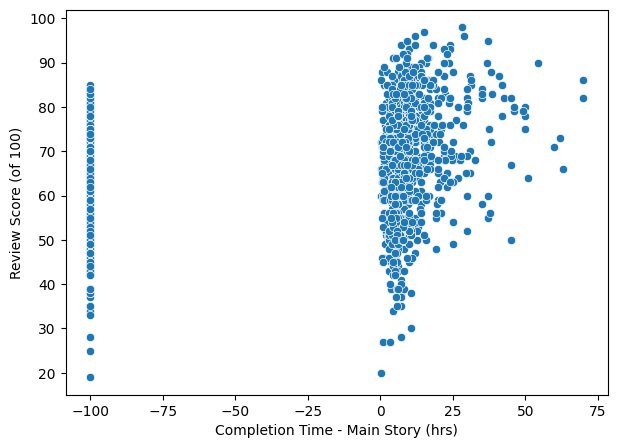

,Title,Max Players,Multiplatform,Online,Genres,Licensed,Comp_Time_Main,Review Score,Year,Publishers
0,Super Mario 64 DS,1,True,True,Action,True,14.50,85,2004,Nintendo
1,Lumines: Puzzle Fusion,1,True,True,Strategy,True,10.00,89,2004,Ubisoft
2,WarioWare Touched!,2,True,True,Action,True,1.83,81,2004,Nintendo
3,Hot Shots Golf: Open Tee,1,True,True,Sports,True,-100.00,81,2004,Sony
4,Spider-Man 2,1,True,True,Action,True,8.00,61,2004,Activision


In [33]:
#### Scatterplot Code Start


plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_task_1c, x='Comp_Time_Main', y='Review Score')

plt.xlabel('Completion Time - Main Story (hrs)')
plt.ylabel('Review Score (of 100)')

# Display the plot
plt.show()

#### Scatterplot Code End

df_task_1c.head()

In [37]:
df_task_2a = df_task_1c[df_task_1c['Comp_Time_Main'] != -100]

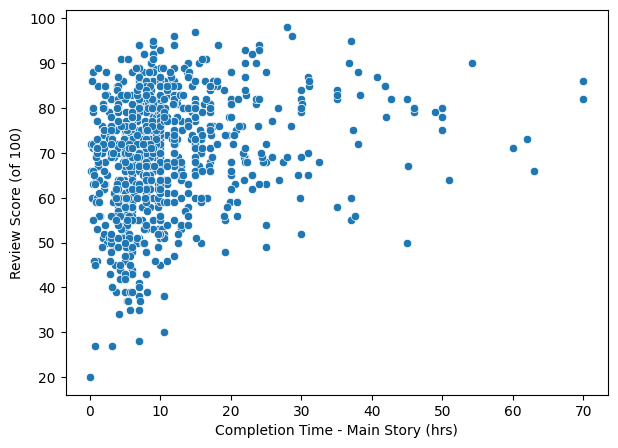

,Title,Max Players,Multiplatform,Online,Genres,Licensed,Comp_Time_Main,Review Score,Year,Publishers
0,Super Mario 64 DS,1,True,True,Action,True,14.50,85,2004,Nintendo
1,Lumines: Puzzle Fusion,1,True,True,Strategy,True,10.00,89,2004,Ubisoft
2,WarioWare Touched!,2,True,True,Action,True,1.83,81,2004,Nintendo
3,Hot Shots Golf: Open Tee,1,True,True,Sports,True,-100.00,81,2004,Sony
4,Spider-Man 2,1,True,True,Action,True,8.00,61,2004,Activision


In [38]:
#### Scatterplot Code Start


plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_task_2a, x='Comp_Time_Main', y='Review Score')

plt.xlabel('Completion Time - Main Story (hrs)')
plt.ylabel('Review Score (of 100)')

# Display the plot
plt.show()

#### Scatterplot Code End

df_task_1c.head()

## **Task 2b: Filtering Out Old Data**

The barchart below, shows the data aggregated by year. There are noticeably fewer records for `2004` and `2005`.

During this subtask we will remove these older records, keeping only the records for year 2006 and above.

#### **Instructions**
2. **Identify Sparse Years:**
    - Use the Seaborn plot with bar chart visualizing the number of video games released that year.
    - Based on the bar chart, identify years before `2006` with fewer records.
4. **Filter Out Sparse Years:**
    - Write Pandas code to exclude these years from the dataset.
5. **Show Output:**
    - Print the head of `df_task_2b` and recreate the bar chart to show the dataset focusing on years 2006 and onwards.


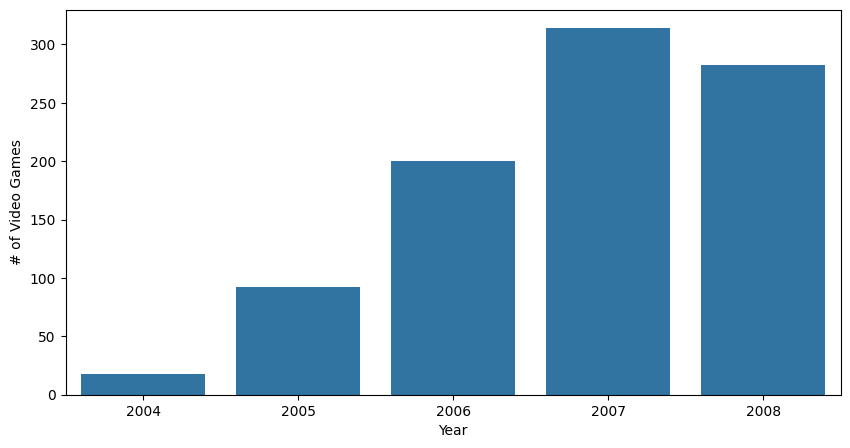

,Title,Max Players,Multiplatform,Online,Genres,Licensed,Comp_Time_Main,Review Score,Year,Publishers
0,Super Mario 64 DS,1,True,True,Action,True,14.50,85,2004,Nintendo
1,Lumines: Puzzle Fusion,1,True,True,Strategy,True,10.00,89,2004,Ubisoft
2,WarioWare Touched!,2,True,True,Action,True,1.83,81,2004,Nintendo
4,Spider-Man 2,1,True,True,Action,True,8.00,61,2004,Activision
5,The Urbz: Sims in the City,1,True,True,Simulation,True,15.50,67,2004,EA


In [39]:
#### Barchart Code Start

plt.figure(figsize=(10, 5))
sns.countplot(x=df_task_2a["Year"])

plt.xlabel('Year')
plt.ylabel('# of Video Games')

# Display the plot
plt.show()

#### Barchart Code End

df_task_2a.head()

In [44]:
df_task_2b= df_task_2a[df_task_2a['Year'] >=2006]

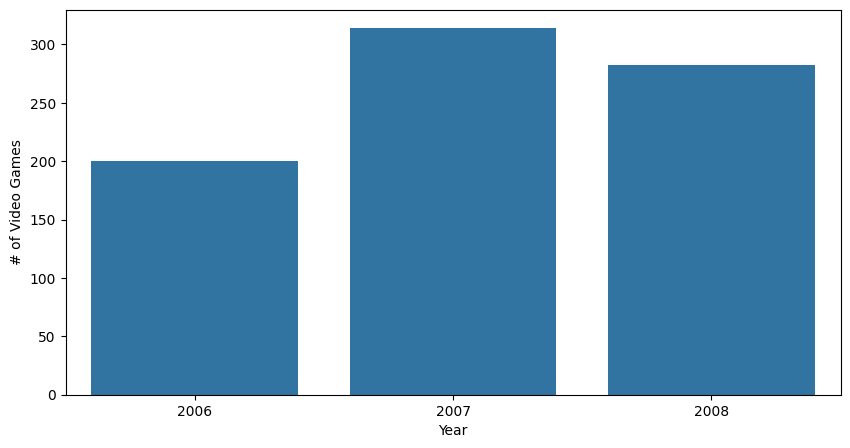

,Title,Max Players,Multiplatform,Online,Genres,Licensed,Comp_Time_Main,Review Score,Year,Publishers
0,Super Mario 64 DS,1,True,True,Action,True,14.50,85,2004,Nintendo
1,Lumines: Puzzle Fusion,1,True,True,Strategy,True,10.00,89,2004,Ubisoft
2,WarioWare Touched!,2,True,True,Action,True,1.83,81,2004,Nintendo
4,Spider-Man 2,1,True,True,Action,True,8.00,61,2004,Activision
5,The Urbz: Sims in the City,1,True,True,Simulation,True,15.50,67,2004,EA


In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df_task_2b["Year"])

plt.xlabel('Year')
plt.ylabel('# of Video Games')

# Display the plot
plt.show()

#### Barchart Code End

df_task_2a.head()

## Task 3: Data Wrangling

### **Task 3a: Creating and assigning `'Length'` category**

Next, we'll introduce a new categorical variable named `Length` into our dataset. This addition aims to classify each game into one of `Short`, `Average` and `Long` based on `Comp_Time_Main` value.

Create a new category `Length` in the dataset and assign each record to `Short`, `Average` and `Long`.

#### **Instructions**
1. **Create New Variable:**
    - Add a new column `Length` to the DataFrame.
2. **Assign Category:**
    - Using the `Comp_Time_Main` value assign proper values to the new category.
    - You should use the following ranges for assigning proper categories:
        - `Short`: 0 - 20 hours
    	- `Average`: 21 - 40 hours,
    	- `Long`: more than 40 hours
3. **Generate Dataframe:**
    - Save the modified DataFrame with the new `Length` category to `df_task_3a`.
4. **Show Output:**
    - Display the head of `df_task_3a` to confirm the addition and categorization of the new variable.

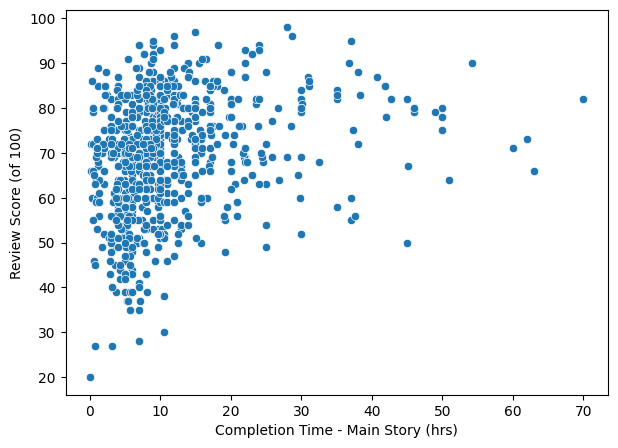

In [46]:
df_task_3a = df_task_2b

#### Scatterplot Code Start

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_task_3a, x='Comp_Time_Main', y='Review Score')

plt.xlabel('Completion Time - Main Story (hrs)')
plt.ylabel('Review Score (of 100)')

# Display the plot
plt.show()

#### Scatterplot Code End

In [48]:
Length = ['Short','Average','Long']
# df_task_3a['Length'] = Length
df_task_3a=df_task_3a.insert(2,'Length',['Short','Average','Long'],True)
if df_task_3a[df_task_3a['Comp_Time_Main'] <=20]:
    df_task_3a['Length']=Short

df_task_3a.head

ValueError: Length of values (3) does not match length of index (796)

## **Task 3b: Finding Top Genre for each `Length`**

In [49]:
df_task_3a = h.load_task_output(3,'a')
df_task_3a.head()

,Length,Title,Max Players,Multiplatform,Online,Genres,Licensed,Comp_Time_Main,Review Score,Year,Publishers
0,Short,Wii Play,2,True,True,Action,True,4.00,58,2006,Nintendo
1,Short,New Super Mario Bros.,1,True,True,Action,True,7.00,89,2006,Nintendo
2,Long,Pokmon Diamond,1,True,True,Role-Playing (RPG),True,41.92,85,2006,Nintendo
3,Long,Pokmon Pearl,1,True,True,Role-Playing (RPG),True,41.92,85,2006,Nintendo
4,Short,Gears of War,2,True,True,Action,True,9.00,94,2006,Microsoft


Now we will analyze which genre is most prevelant for games in each length category.

#### **Instructions**
1. **Context:**
    - We have a faceted bar chart. The `x` axis encodes the `Genres` column in the data and the columns encode the newly added category `Length`.
2. **Analyze Genres:**
    - Observe the bar charts to identify the top genre for the each length.
    - You can hover on the bars to get the exact frequency.
3. **Document Findings:**
    - Note down the most common Genre for each length based on your interactive analysis in a new markdown cell.

In [50]:
NEW_COLUMN = "Length"

chart = alt.Chart(df_task_3a).mark_bar().encode(
    x="Genres:N",
    y="count():Q",
    color=f"{NEW_COLUMN}:N",
    column=f"{NEW_COLUMN}:N",
    tooltip="count()"
)
chart

alt.Chart(...)

**Task 3b Notes:**

- Top publisher for `Short` games: Action (521)
- Top publisher for `Average` games: Role-Playing (34)
- Top publisher for `Long` games: Role-Playing (14)